In [1]:
#поработаем с данными о рекламных объявлениях
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px



In [2]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [3]:
ads = pd.read_csv('/home/jupyter-a.kosheleva-14/ads_data.csv', parse_dates=['date','time'])

In [4]:
ads_clients = pd.read_csv('/home/jupyter-a.kosheleva-14/ads_clients_data.csv', parse_dates=['date','create_date'])

In [5]:
ads_clients

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,-130470790,2018-12-21
122074,2020-05-07,122075,-130911261,2018-11-09
122075,2020-05-07,122076,-130494912,2018-10-27
122076,2020-05-07,122077,-130910585,2018-12-05


In [6]:
ads

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-05,2019-04-05 20:59:52,view,web,112583,111818,112260,CPM,210.1,0,22392
999996,2019-04-05,2019-04-05 20:59:52,view,android,112583,111818,112260,CPM,210.1,0,22392
999997,2019-04-05,2019-04-05 20:59:52,click,web,112583,111818,112260,CPM,210.1,0,22392
999998,2019-04-05,2019-04-05 20:59:52,view,web,113350,113036,113251,CPM,183.3,0,571929


In [7]:
#посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям
ads_events = ads.groupby('event', as_index = False) \
    .agg({'time':'count'})
ads_events
ads.ad_id.nunique()
ads_events['percent'] = (ads_events.time/965).round()


In [8]:
ads_events

,event,time,percent
0,click,109178,113.0
1,view,890822,923.0


In [9]:
ads.ad_id.nunique()

965

In [10]:
#Давайте посмотрим на распределение показов объявлений!
for_visual = ads.groupby(['ad_id','event'], as_index = False) \
    .agg({'time':'count'})

last_visual = for_visual.query('event == "view"')
last_visual

,ad_id,event,time
1,2,view,101
3,3,view,184
5,1902,view,41
6,2064,view,35
8,2132,view,58
...,...,...,...
1475,122004,view,100
1476,122013,view,156
1477,122023,view,68
1479,122031,view,138


In [11]:
#но сначала прологарифмируем
last_visual['time'] = np.log(last_visual.time)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
last_visual

,ad_id,event,time
1,2,view,4.615121
3,3,view,5.214936
5,1902,view,3.713572
6,2064,view,3.555348
8,2132,view,4.060443
...,...,...,...
1475,122004,view,4.605170
1476,122013,view,5.049856
1477,122023,view,4.219508
1479,122031,view,4.927254


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


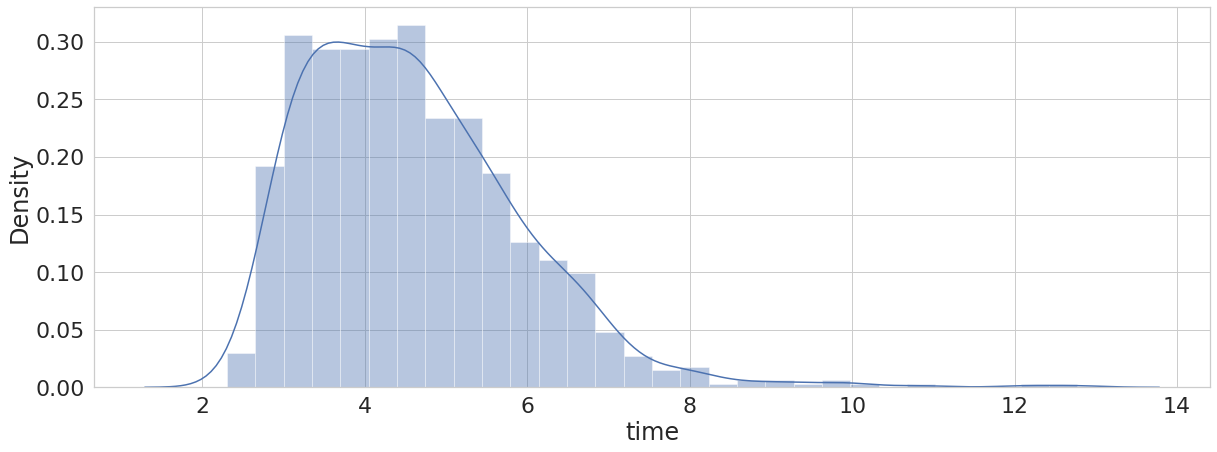

In [13]:
sns.distplot(last_visual.time)

In [14]:
#Теперь нужно найти количество показов на 1 объявление в день
adperday = ads.query('event == "view"') \
    .groupby(['ad_id', 'date'], as_index = False) \
    .agg({'time':'count'})
adperday

,ad_id,date,time
0,2,2019-04-01,83
1,2,2019-04-02,18
2,3,2019-04-01,158
3,3,2019-04-02,26
4,1902,2019-04-03,34
...,...,...,...
1926,122023,2019-04-05,15
1927,122031,2019-04-05,119
1928,122031,2019-04-06,19
1929,122078,2019-04-03,36


In [24]:
#а теперь среднее количество показов в день без разбивки на рекламу
newadday = adperday.groupby('date', as_index = False) \
    .agg({'time':'mean'})
newadday

,date,time
0,2019-04-01,154.482270
1,2019-04-02,137.786982
2,2019-04-03,163.952778
3,2019-04-04,675.901720
4,2019-04-05,919.109677
5,2019-04-06,277.122727


In [25]:
#найдем скользящее среднее
newadday['roll'] = newadday.time.rolling(2).mean().round()

In [26]:
newadday

,date,time,roll
0,2019-04-01,154.482270,NaN
1,2019-04-02,137.786982,146.0
2,2019-04-03,163.952778,151.0
3,2019-04-04,675.901720,420.0
4,2019-04-05,919.109677,798.0
5,2019-04-06,277.122727,598.0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


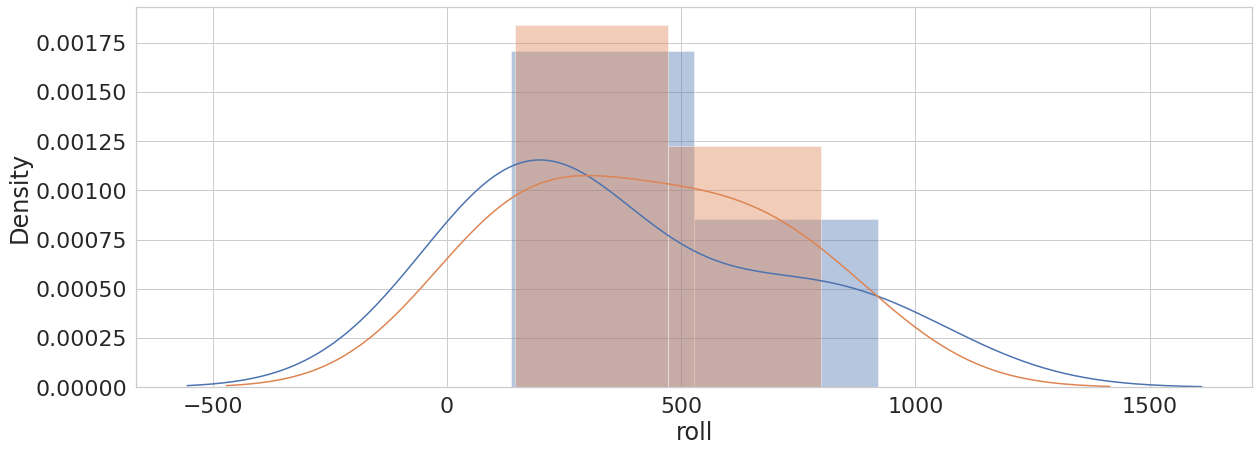

In [27]:
sns.distplot(newadday.time)
sns.distplot(newadday.roll)

In [28]:
#на сколько среднее отличается от скользящего среднего
newadday['difference'] = abs(newadday.time - newadday.roll)

In [29]:
newadday

,date,time,roll,difference
0,2019-04-01,154.482270,NaN,NaN
1,2019-04-02,137.786982,146.0,8.213018
2,2019-04-03,163.952778,151.0,12.952778
3,2019-04-04,675.901720,420.0,255.901720
4,2019-04-05,919.109677,798.0,121.109677
5,2019-04-06,277.122727,598.0,320.877273


In [30]:
#найдем id проблемной рекламы, которая вызвала скачок
hard_day = adperday.query('date == "2019-04-06"')

hard_day.time.max()

hard_day.query('time == 48991')

,ad_id,date,time
1579,112583,2019-04-06,48991


In [31]:
#объединим данные рекламы с данными о рекламных клиентах и найдем среднее количество дней от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом
clientswithads = ads.merge(ads_clients, how = 'inner', on = 'client_union_id')
clientswithads

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-04,2019-04-04 18:07:25,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04
999996,2019-04-04,2019-04-04 18:29:06,view,ios,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04
999997,2019-04-04,2019-04-04 18:55:46,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04
999998,2019-04-04,2019-04-04 19:21:09,view,android,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04


In [32]:
clientswithads['differ'] = clientswithads.date_x - clientswithads.create_date

In [33]:
clientswithads

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,differ
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-04,2019-04-04 18:07:25,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days
999996,2019-04-04,2019-04-04 18:29:06,view,ios,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days
999997,2019-04-04,2019-04-04 18:55:46,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days
999998,2019-04-04,2019-04-04 19:21:09,view,android,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days


In [34]:
#сгруппируем среднее количество дней от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом
differ_first = clientswithads.groupby('client_union_id', as_index = False) \
    .agg({'differ':'min'})
differ_first

,client_union_id,differ
0,1,98 days
1,9,114 days
2,13,66 days
3,16,105 days
4,20,32 days
...,...,...
833,122004,67 days
834,122013,151 days
835,122023,126 days
836,122031,96 days


In [35]:
#найдем среднее значение
differ_first.differ.mean()

Timedelta('124 days 09:04:43.532219570')

In [182]:
#Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.
clientswithads['differ_categorical'] = pd.cut(clientswithads.differ, pd.to_timedelta(["0 days 00:00:00", "30 days 00:00:00", "90 days 00:00:00","180 days 00:00:00","365 days 00:00:00"]))

In [183]:
clientswithads

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,differ,differ_categorical
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days,"(90 days 00:00:00, 180 days 00:00:00]"
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days,"(90 days 00:00:00, 180 days 00:00:00]"
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days,"(90 days 00:00:00, 180 days 00:00:00]"
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days,"(90 days 00:00:00, 180 days 00:00:00]"
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04,118 days,"(90 days 00:00:00, 180 days 00:00:00]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-04,2019-04-04 18:07:25,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days,"(30 days 00:00:00, 90 days 00:00:00]"
999996,2019-04-04,2019-04-04 18:29:06,view,ios,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days,"(30 days 00:00:00, 90 days 00:00:00]"
999997,2019-04-04,2019-04-04 18:55:46,view,web,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days,"(30 days 00:00:00, 90 days 00:00:00]"
999998,2019-04-04,2019-04-04 19:21:09,view,android,43921,30712,43920,CPM,196.7,0,7807,2020-05-07,-130652663,2019-03-04,31 days,"(30 days 00:00:00, 90 days 00:00:00]"


In [184]:
#сколько человек попало в каждую группу?
clientswithads.differ_categorical.value_counts()

(30 days 00:00:00, 90 days 00:00:00]      581476
(90 days 00:00:00, 180 days 00:00:00]     363404
(180 days 00:00:00, 365 days 00:00:00]     53431
(0 days 00:00:00, 30 days 00:00:00]         1689
Name: differ_categorical, dtype: int64